In [43]:
import datetime
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from matplotlib import dates as mdates

In [44]:
dt = datetime.datetime.now()
date_str = f"{dt.year:04d}{dt.month:02d}{dt.day:02d}"
date_str

'20251112'

In [45]:
code = "7011"
code

'7011'

In [46]:
path_png = os.path.join("..", "screenshots", f"{date_str}_{code}_marathon.png")
path_png

'../screenshots/20251112_7011_marathon.png'

In [47]:
path_png_2 = os.path.join("..", "screenshots", f"{date_str}_{code}_marathon_corr.png")
path_png_2

'../screenshots/20251112_7011_marathon_corr.png'

In [48]:
file = "result_20251112154044.csv"
path_file = os.path.join("..", "output", file)
path_file

'../output/result_20251112154044.csv'

In [49]:
df = pd.read_csv(path_file, usecols=[1, 2, 3])
df.head()

,ファイル,取引回数,総損益
0,ticks_20250819.xlsx,8,99.0
1,ticks_20250820.xlsx,26,-17.0
2,ticks_20250821.xlsx,6,46.0
3,ticks_20250822.xlsx,8,26.0
4,ticks_20250825.xlsx,34,29.0


In [50]:
pattern = re.compile(r"ticks_(\d{4})(\d{2})(\d{2})\.xlsx")

list_index = list()
for file in df["ファイル"]:
    if m := pattern.match(file):
        date_str = f"{m.group(1)}-{m.group(2)}-{m.group(3)}"
    else:
        date_str = "1970-01-01"
    list_index.append(date_str)
df.index = pd.to_datetime(list_index)
df.head()

,ファイル,取引回数,総損益
2025-08-19,ticks_20250819.xlsx,8,99.0
2025-08-20,ticks_20250820.xlsx,26,-17.0
2025-08-21,ticks_20250821.xlsx,6,46.0
2025-08-22,ticks_20250822.xlsx,8,26.0
2025-08-25,ticks_20250825.xlsx,34,29.0


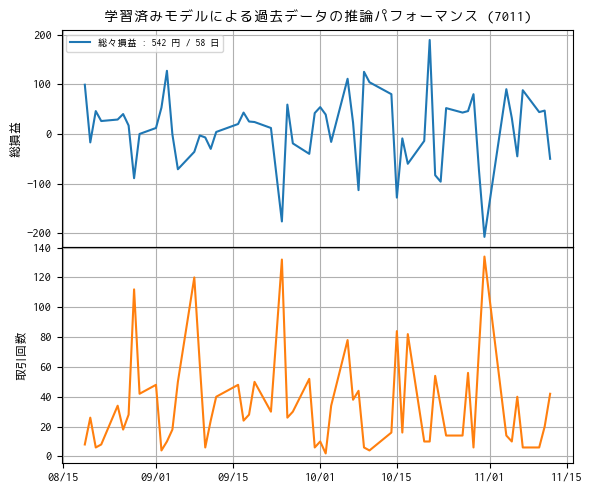

In [51]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

fig = plt.figure(figsize=(6, 5))
n = 2
ax = dict()
gs = fig.add_gridspec(n, 1, wspace=0.0, hspace=0.0, height_ratios=[1 for i in range(n)])
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

ax[0].plot(
    df["総損益"],
    color="C0",
    label=f"総々損益 : {df["総損益"].sum():,.0f} 円 / {len(df)} 日",
)
ax[0].set_ylabel("総損益")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
ax[0].legend(fontsize=7)
ax[0].set_title(f"学習済みモデルによる過去データの推論パフォーマンス ({code})")

ax[1].plot(df["取引回数"], color="C1")
ax[1].set_ylabel("取引回数")
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))

plt.tight_layout()
plt.savefig(path_png)
plt.show()

In [52]:
df["総損益"].values

array([  99.,  -17.,   46.,   26.,   29.,   40.,   17.,  -89.,    0.,
         12.,   53.,  127.,   -1.,  -71.,  -36.,   -3.,   -7.,  -30.,
          4.,   20.,   43.,   25.,   24.,   12., -176.,   59.,  -19.,
        -40.,   42.,   54.,   39.,  -16.,  111.,   23., -113.,  125.,
        104.,   80., -128.,   -9.,  -60.,  -14.,  189.,  -83.,  -96.,
         52.,   43.,   46.,   80.,  -73., -207.,   90.,   32.,  -45.,
         88.,   44.,   47.,  -50.])

In [53]:
df_corr = df[["取引回数", "総損益"]].corr()
corr = df_corr.iloc[0, 1]
corr

np.float64(-0.7093075371437683)

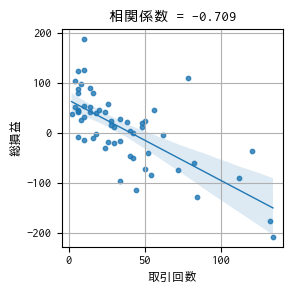

In [54]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.regplot(
    data=df,
    x="取引回数",
    y="総損益",
    scatter_kws={"s": 10},
    line_kws={"linewidth": 1},
    ax=ax,
)

ax.set_xlabel("取引回数")
ax.set_ylabel("総損益")
ax.set_title(f"相関係数 = {corr:-.3f}")
ax.grid()

plt.tight_layout()
plt.savefig(path_png_2)
plt.show()